# Demo script for the ProblemSolver class.

This script is intended to help with debugging problems and solvers.

It create a problem-solver pairing (using the directory) and runs multiple macroreplications of the solver on the problem.

## Append SimOpt Path

Since the notebook is stored in simopt/notebooks, we need to append the parent simopt directory to the system path to import the necessary modules later on.

In [8]:
import sys
from pathlib import Path

# Take the current directory, find the parent, and add it to the system path
sys.path.append(str(Path.cwd().parent))

## Configuration Parameters

This section defines the core parameters for the demo.

To query model/problem/solver names, run `python scripts/list_directories.py`

In [9]:
# Specify the names of the solver and problem to test.
# Example with random search solver on continuous newsvendor problem:
# solver_abbr_name = "RNDSRCH"
# problem_abbr_name = "CNTNEWS-1"
solver_abbr_name = "RNDSRCH"
problem_abbr_name = "CNTNEWS-1"

num_macroreps = 10
num_postreps = 200
num_postreps_init_opt = 200

In [10]:
# If the solver runs have already been performed, specify the file name path.
# If no path is specified, a new run will be performed.
file_name_path = None

if file_name_path is None:
    # Import the ProblemSolver class and other useful functions
    from simopt.experiment_base import ProblemSolver

    # Initialize an instance of the experiment class.
    myexperiment = ProblemSolver(solver_abbr_name, problem_abbr_name)

    # Run a fixed number of macroreplications of the solver on the problem.
    myexperiment.run(n_macroreps=num_macroreps)
else:
    # following pair of lines (and uncomment the myexperiment.run(...)
    # line above) to read in results from a .pickle file.
    # file_name_path = ""
    from simopt.experiment_base import read_experiment_results

    myexperiment = read_experiment_results(file_name_path)

In [11]:
# Run a fixed number of postreplications at all recommended solutions.
myexperiment.post_replicate(n_postreps=num_postreps)

In [12]:
# Find an optimal solution x* for normalization.
from simopt.experiment_base import post_normalize

post_normalize([myexperiment], n_postreps_init_opt=num_postreps_init_opt)

In [13]:
# Log results.
myexperiment.log_experiment_results()

Plotting results...
Plot saved to [WindowsPath('C:/Users/will_/Documents/repos/simopt/experiments/2025-08-22_12-17-06/plots/SOLVER_SET_CNTNEWS-1_all_prog_curves_unnorm (1).png')]
Plot saved to [WindowsPath('C:/Users/will_/Documents/repos/simopt/experiments/2025-08-22_12-17-06/plots/SOLVER_SET_CNTNEWS-1_mean_prog_curve_unnorm (1).png')]
Plot saved to [WindowsPath('C:/Users/will_/Documents/repos/simopt/experiments/2025-08-22_12-17-06/plots/SOLVER_SET_CNTNEWS-1_0.9_quantile_prog_curve_unnorm (1).png')]
Plot saved to [WindowsPath('C:/Users/will_/Documents/repos/simopt/experiments/2025-08-22_12-17-06/plots/SOLVER SET_CNTNEWS-1_cdf_0.1_solve_times (1).png')]
Plotting complete!


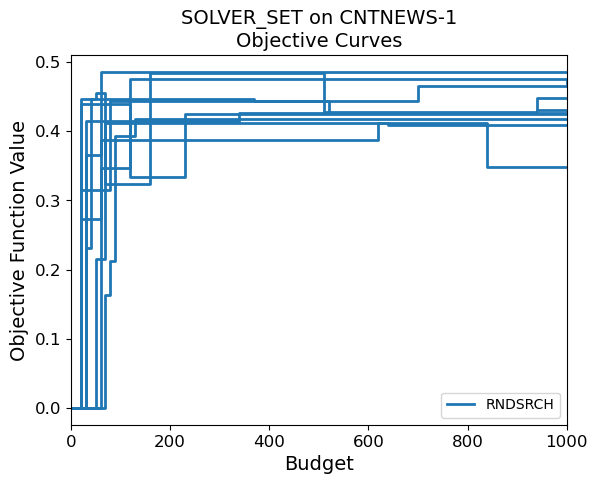

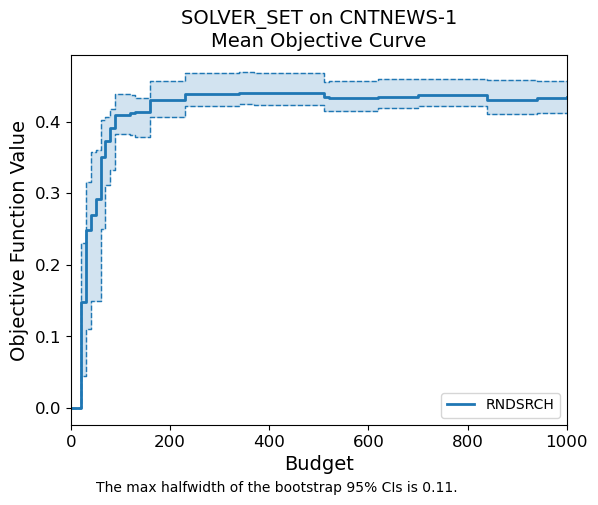

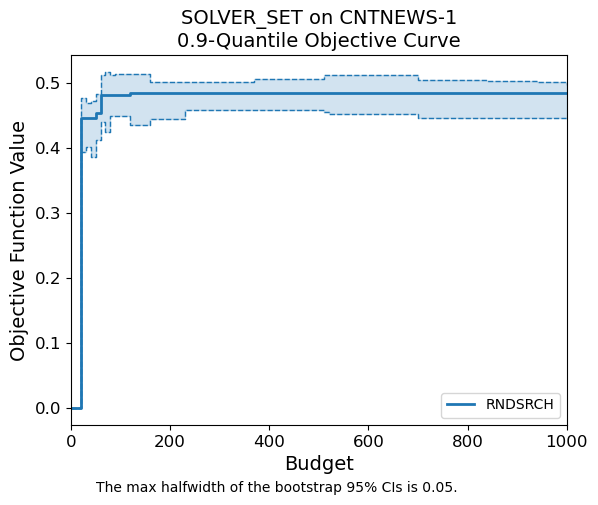

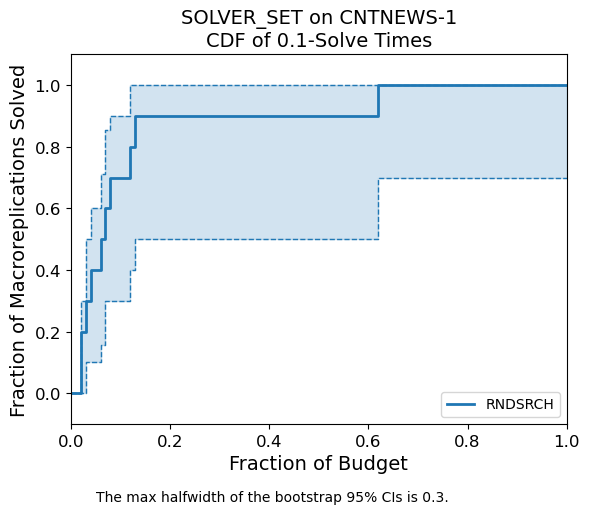

In [14]:
# Produce basic plots.

from simopt.experiment_base import (
    PlotType,
    plot_progress_curves,
    plot_solvability_cdfs,
)

print("Plotting results...")


def _print_path(plot_path: list[Path]) -> None:
    print(f"Plot saved to {plot_path!s}")


_print_path(
    plot_progress_curves(
        experiments=[myexperiment], plot_type=PlotType.ALL, normalize=False
    )
)
_print_path(
    plot_progress_curves(
        experiments=[myexperiment], plot_type=PlotType.MEAN, normalize=False
    )
)
_print_path(
    plot_progress_curves(
        experiments=[myexperiment],
        plot_type=PlotType.QUANTILE,
        beta=0.90,
        normalize=False,
    )
)
_print_path(plot_solvability_cdfs(experiments=[myexperiment], solve_tol=0.1))

print("Plotting complete!")